In [ ]:
import sqlite3

def setup_database():
    conn = sqlite3.connect('test_data.db')
    cursor = conn.cursor()
    
    # Create Students Table
    cursor.execute('''CREATE TABLE IF NOT EXISTS Students (
                        student_id INTEGER PRIMARY KEY AUTOINCREMENT,
                        student_name TEXT NOT NULL)''')
    
    # Create Tests Table
    cursor.execute('''CREATE TABLE IF NOT EXISTS Tests (
                        test_id INTEGER PRIMARY KEY AUTOINCREMENT,
                        test_name TEXT NOT NULL)''')
    
    # Create Questions Table
    cursor.execute('''CREATE TABLE IF NOT EXISTS Questions (
                        question_id INTEGER PRIMARY KEY AUTOINCREMENT,
                        test_id INTEGER NOT NULL,
                        question_number INTEGER NOT NULL,
                        FOREIGN KEY (test_id) REFERENCES Tests(test_id))''')
    
    # Create Topics Table
    cursor.execute('''CREATE TABLE IF NOT EXISTS Topics (
                        topic_id INTEGER PRIMARY KEY AUTOINCREMENT,
                        topic REAL NOT NULL)''')
    
    # Create QuestionTopics Table
    cursor.execute('''CREATE TABLE IF NOT EXISTS QuestionTopics (
                        question_id INTEGER NOT NULL,
                        topic_id INTEGER NOT NULL,
                        FOREIGN KEY (question_id) REFERENCES Questions(question_id),
                        FOREIGN KEY (topic_id) REFERENCES Topics(topic_id))''')
    
    # Create Scores Table
    cursor.execute('''CREATE TABLE IF NOT EXISTS Scores (
                        score_id INTEGER PRIMARY KEY AUTOINCREMENT,
                        student_id INTEGER NOT NULL,
                        question_id INTEGER NOT NULL,
                        score INTEGER NOT NULL,
                        FOREIGN KEY (student_id) REFERENCES Students(student_id),
                        FOREIGN KEY (question_id) REFERENCES Questions(question_id))''')
    
    conn.commit()
    conn.close()


In [ ]:
import sqlite3

def output_database():
    # Connect to the SQLite database
    conn = sqlite3.connect('test_data.db')
    cursor = conn.cursor()
    
    # Fetch and print Students table
    cursor.execute('SELECT * FROM Students')
    students = cursor.fetchall()
    print("Students:")
    for student in students:
        print(student)
    
    # Fetch and print Tests table
    cursor.execute('SELECT * FROM Tests')
    tests = cursor.fetchall()
    print("\nTests:")
    for test in tests:
        print(test)
    
    # Fetch and print Questions table
    cursor.execute('SELECT * FROM Questions')
    questions = cursor.fetchall()
    print("\nQuestions:")
    for question in questions:
        print(question)
    
    # Fetch and print Topics table
    cursor.execute('SELECT * FROM Topics')
    topics = cursor.fetchall()
    print("\nTopics:")
    for topic in topics:
        print(topic)
    
    # Fetch and print QuestionTopics table
    cursor.execute('SELECT * FROM QuestionTopics')
    question_topics = cursor.fetchall()
    print("\nQuestionTopics:")
    for question_topic in question_topics:
        print(question_topic)
    
    # Fetch and print Scores table
    cursor.execute('SELECT * FROM Scores')
    scores = cursor.fetchall()
    print("\nScores:")
    for score in scores:
        print(score)
    
    # Close the connection
    conn.close()




In [ ]:
def clear_database():
    # Connect to the SQLite database
    conn = sqlite3.connect('test_data.db')
    cursor = conn.cursor()
    
    # List of tables to drop
    tables = ['Scores', 'QuestionTopics', 'Questions', 'Topics', 'Tests', 'Students']
    
    # Drop each table if it exists
    for table in tables:
        cursor.execute(f'DROP TABLE IF EXISTS {table}')
    
    # Commit changes and close the connection
    conn.commit()
    conn.close()


In [8]:
import csv
import sqlite3

def insert_data(filename):
    conn = sqlite3.connect('test_data.db')
    cursor = conn.cursor()
    
    # Create sets to store unique student names, test names, and topics
    student_names = set()
    test_names = set()
    topics = set()
    
    # Read data from the CSV file
    with open(filename, newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        data = [row for row in reader]
    
    # Insert unique students
    for row in data:
        student_names.add(row['student_name'])
    students = [(name,) for name in student_names]
    cursor.executemany('INSERT INTO Students (student_name) VALUES (?)', students)


    
    # Insert unique tests
    for row in data:
        test_names.add(row['test_name'])
    tests = [(name,) for name in test_names]
    cursor.executemany('INSERT INTO Tests (test_name) VALUES (?)', tests)
    
    # Insert unique topics
    for row in data:
        for topic in row['topics'].split(';'):
            topics.add(float(topic))
    topic_records = [(topic,) for topic in topics]
    cursor.executemany('INSERT INTO Topics (topic) VALUES (?)', topic_records)
    
    # Create mappings
    cursor.execute('SELECT student_id, student_name FROM Students')
    student_id_map = {name: student_id for student_id, name in cursor.fetchall()}
    
    cursor.execute('SELECT test_id, test_name FROM Tests')
    test_id_map = {name: test_id for test_id, name in cursor.fetchall()}
    
    cursor.execute('SELECT topic_id, topic FROM Topics')
    topic_id_map = {topic: topic_id for topic_id, topic in cursor.fetchall()}
    
    # Insert questions and scores
    questions = {}
    scores = []
    for row in data:
        test_id = test_id_map[row['test_name']]
        question_number = int(row['question_number'])
        student_id = student_id_map[row['student_name']]
        score = int(row['score'])
        
        question_key = (test_id, question_number)
        if question_key not in questions:
            cursor.execute('INSERT INTO Questions (test_id, question_number) VALUES (?, ?)', (test_id, question_number))
            question_id = cursor.lastrowid
            questions[question_key] = question_id
        question_id = questions[question_key]
        
        for topic in row['topics'].split(';'):
            topic_id = topic_id_map[float(topic)]
            cursor.execute('INSERT INTO QuestionTopics (question_id, topic_id) VALUES (?, ?)', (question_id, topic_id))
        
        scores.append((student_id, question_id, score))
    
    # Insert scores into the Scores table
    cursor.executemany('INSERT INTO Scores (student_id, question_id, score) VALUES (?, ?, ?)', scores)
    
    # Commit changes and close the connection
    conn.commit()
    conn.close()




In [9]:
clear_database()
setup_database()
insert_data('data.csv')
output_database()

Students:
(1, 'student_5')
(2, 'student_3')
(3, 'student_4')
(4, 'student_2')
(5, 'student_1')

Tests:
(1, 'test_1')

Questions:
(1, 1, 1)
(2, 1, 2)
(3, 1, 3)
(4, 1, 4)
(5, 1, 5)
(6, 1, 6)
(7, 1, 7)
(8, 1, 8)
(9, 1, 9)
(10, 1, 10)

Topics:
(1, 1.1)
(2, 1.4)
(3, 1.3)
(4, 1.2)
(5, 1.5)

QuestionTopics:
(1, 1)
(2, 1)
(3, 1)
(3, 4)
(4, 1)
(4, 4)
(5, 4)
(6, 4)
(7, 4)
(7, 3)
(8, 3)
(9, 2)
(10, 2)
(10, 5)
(1, 1)
(2, 1)
(3, 1)
(3, 4)
(4, 1)
(4, 4)
(5, 4)
(6, 4)
(7, 4)
(7, 3)
(8, 3)
(9, 2)
(10, 2)
(10, 5)
(1, 1)
(2, 1)
(3, 1)
(3, 4)
(4, 1)
(4, 4)
(5, 4)
(6, 4)
(7, 4)
(7, 3)
(8, 3)
(9, 2)
(10, 2)
(10, 5)
(1, 1)
(2, 1)
(3, 1)
(3, 4)
(4, 1)
(4, 4)
(5, 4)
(6, 4)
(7, 4)
(7, 3)
(8, 3)
(9, 2)
(10, 2)
(10, 5)
(1, 1)
(2, 1)
(3, 1)
(3, 4)
(4, 1)
(4, 4)
(5, 4)
(6, 4)
(7, 4)
(7, 3)
(8, 3)
(9, 2)
(10, 2)
(10, 5)

Scores:
(1, 5, 1, 1)
(2, 5, 2, 1)
(3, 5, 3, 1)
(4, 5, 4, 1)
(5, 5, 5, 0)
(6, 5, 6, 1)
(7, 5, 7, 0)
(8, 5, 8, 1)
(9, 5, 9, 1)
(10, 5, 10, 0)
(11, 4, 1, 0)
(12, 4, 2, 0)
(13, 4, 3, 0)
(14, 4, 4, 0)
(

In [10]:
import sqlite3

def get_student_performance_by_test(student_name):
    conn = sqlite3.connect('test_data.db')
    cursor = conn.cursor()
    
    # Get the student_id for the given student_name
    cursor.execute('SELECT student_id FROM Students WHERE student_name = ?', (student_name,))
    student_id = cursor.fetchone()
    
    if not student_id:
        print(f"Student {student_name} not found.")
        return
    student_id = student_id[0]
    
    # Query to get the student's scores across all tests
    cursor.execute('''
        SELECT Tests.test_name, AVG(Scores.score)
        FROM Scores
        JOIN Questions ON Scores.question_id = Questions.question_id
        JOIN Tests ON Questions.test_id = Tests.test_id
        WHERE Scores.student_id = ?
        GROUP BY Tests.test_name
    ''', (student_id,))
    
    results = cursor.fetchall()
    
    print(f"Performance of {student_name} by Test:")
    for test_name, avg_score in results:
        print(f"Test: {test_name}, Average Score: {avg_score:.2f}")
    
    conn.close()


In [12]:
get_student_performance_by_test('student_2')

Performance of student_2 by Test:
Test: test_1, Average Score: 0.40


In [13]:
get_student_performance_by_test('student_4')

Performance of student_4 by Test:
Test: test_1, Average Score: 0.70


In [14]:
import sqlite3

def get_student_performance_by_topic(student_name):
    conn = sqlite3.connect('test_data.db')
    cursor = conn.cursor()
    
    # Get the student_id for the given student_name
    cursor.execute('SELECT student_id FROM Students WHERE student_name = ?', (student_name,))
    student_id = cursor.fetchone()
    
    if not student_id:
        print(f"Student {student_name} not found.")
        return
    student_id = student_id[0]
    
    # Query to get the student's scores across all topics
    cursor.execute('''
        SELECT Topics.topic, AVG(Scores.score)
        FROM Scores
        JOIN Questions ON Scores.question_id = Questions.question_id
        JOIN QuestionTopics ON Questions.question_id = QuestionTopics.question_id
        JOIN Topics ON QuestionTopics.topic_id = Topics.topic_id
        WHERE Scores.student_id = ?
        GROUP BY Topics.topic
    ''', (student_id,))
    
    results = cursor.fetchall()
    
    print(f"Performance of {student_name} by Topic:")
    for topic, avg_score in results:
        print(f"Topic: {topic}, Average Score: {avg_score:.2f}")
    
    conn.close()


In [15]:
get_student_performance_by_topic('student_1')

Performance of student_1 by Topic:
Topic: 1.1, Average Score: 1.00
Topic: 1.2, Average Score: 0.60
Topic: 1.3, Average Score: 0.50
Topic: 1.4, Average Score: 0.50
Topic: 1.5, Average Score: 0.00


In [16]:
import sqlite3

def get_overall_performance_by_topic():
    conn = sqlite3.connect('test_data.db')
    cursor = conn.cursor()
    
    # Query to get the average scores across all students for each topic
    cursor.execute('''
        SELECT Topics.topic, AVG(Scores.score)
        FROM Scores
        JOIN Questions ON Scores.question_id = Questions.question_id
        JOIN QuestionTopics ON Questions.question_id = QuestionTopics.question_id
        JOIN Topics ON QuestionTopics.topic_id = Topics.topic_id
        GROUP BY Topics.topic
    ''')
    
    results = cursor.fetchall()
    
    print("Overall Performance by Topic:")
    for topic, avg_score in results:
        print(f"Topic: {topic}, Average Score: {avg_score:.2f}")
    
    conn.close()


In [17]:
get_overall_performance_by_topic()

Overall Performance by Topic:
Topic: 1.1, Average Score: 0.65
Topic: 1.2, Average Score: 0.72
Topic: 1.3, Average Score: 0.50
Topic: 1.4, Average Score: 0.40
Topic: 1.5, Average Score: 0.60


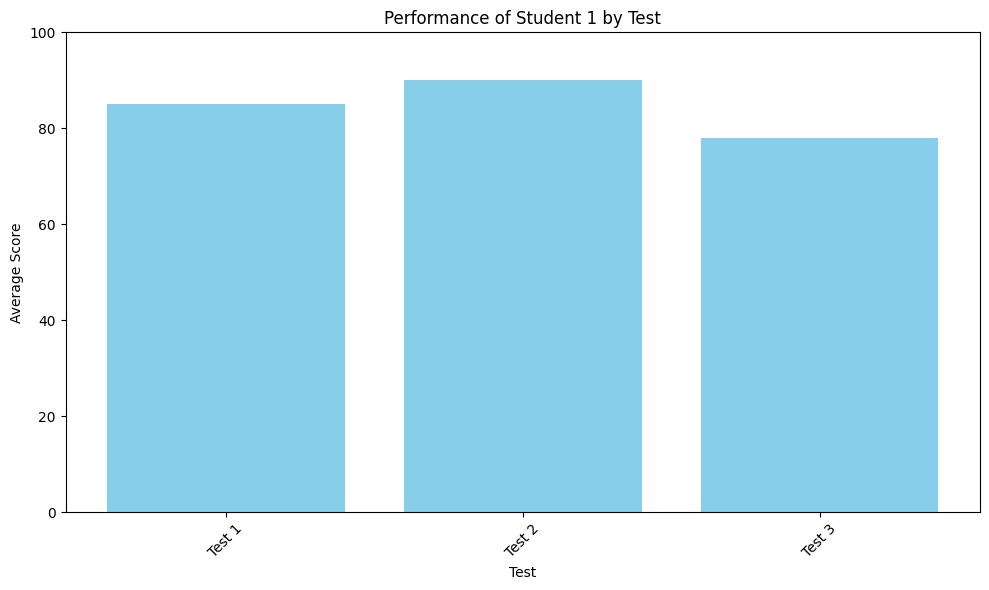

In [24]:
import matplotlib.pyplot as plt

def plot_student_performance_by_test(student_name, test_names, avg_scores):
    plt.figure(figsize=(10, 6))
    plt.bar(test_names, avg_scores, color='skyblue')
    plt.xlabel('Test')
    plt.ylabel('Average Score')
    plt.title(f'Performance of {student_name} by Test')
    plt.xticks(rotation=45)
    plt.ylim(0, 100)  # Assuming scores are out of 100
    plt.tight_layout()
    plt.show()

# Example usage:
test_names = ['Test 1', 'Test 2', 'Test 3']
avg_scores = [85.0, 90.0, 78.0]
plot_student_performance_by_test('Student 1', test_names, avg_scores)



In [25]:
import sqlite3

def get_average_score_by_topic():
    conn = sqlite3.connect('test_data.db')
    cursor = conn.cursor()
    
    # Query to get the average scores across all students for each topic
    cursor.execute('''
        SELECT Topics.topic, AVG(Scores.score) as average_score
        FROM Scores
        JOIN Questions ON Scores.question_id = Questions.question_id
        JOIN QuestionTopics ON Questions.question_id = QuestionTopics.question_id
        JOIN Topics ON QuestionTopics.topic_id = Topics.topic_id
        GROUP BY Topics.topic
        ORDER BY Topics.topic ASC
    ''')
    
    results = cursor.fetchall()
    conn.close()
    
    # Separate the results into two lists for plotting
    topics = [row[0] for row in results]
    avg_scores = [row[1] for row in results]
    
    return topics, avg_scores

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the CSV file
file_path = '/mnt/data/data.csv'
data = pd.read_csv(file_path)

# Step 2: Split the 'topics' column and expand the data
data_expanded = data.assign(topics=data['topics'].str.split(';')).explode('topics')

# Convert the 'topics' column to float for correct numerical sorting
data_expanded['topics'] = data_expanded['topics'].astype(float)

# Step 3: Calculate the average score for each topic
average_scores_by_topic = data_expanded.groupby('topics')['score'].mean().reset_index()

# Step 4: Plot the average scores by topic
def plot_average_score_by_topic(topics, avg_scores):
    plt.figure(figsize=(10, 6))
    plt.bar(topics, avg_scores, color='skyblue')
    plt.xlabel('Topic')
    plt.ylabel('Average Score')
    plt.title('Average Score by Topic')
    plt.xticks(rotation=45)
    plt.ylim(0, 1)  # Scores are binary (0 or 1), so the range is from 0 to 1
    plt.tight_layout()
    plt.show()

# Prepare the data for plotting
topics = average_scores_by_topic['topics']
avg_scores = average_scores_by_topic['score']

# Plot the data
plot_average_score_by_topic(topics, avg_scores)

# Display the processed data for verification (optional)
print(average_scores_by_topic)


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/data.csv'